# Proyecto IA - Redes neuronales

Ernesto Anaya - 190656 | Héctor G. T. Torres - 191589

In [1]:
import keras
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from keras.utils import to_categorical
from keras import models
from keras import layers
from matplotlib import pyplot as plt
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Red Default: 1 capa de 512 neuronas - RMSprop

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8759
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9804
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9894


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 682us/step - loss: 0.0648 - accuracy: 0.9811


### Accuracy

In [9]:
print('test_acc:', test_acc)

test_acc: 0.9811000227928162


### Matriz de confusión

In [14]:
test_predictions = network.predict(test_images)

In [15]:
conf = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictions,axis=1))


<AxesSubplot:>

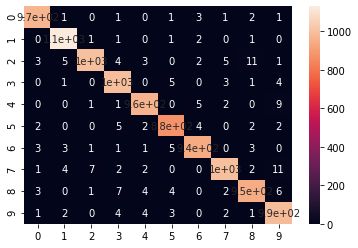

In [16]:
sns.heatmap(conf, annot=True)

### Loss vs. Epoch

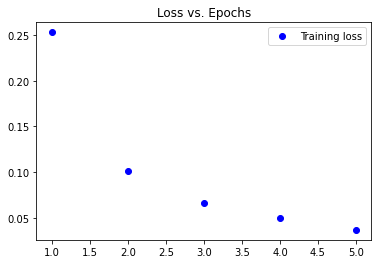

In [19]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

## Red A: 2 capas de 128 neuronas - RMSprop

In [20]:
networkA = models.Sequential()
networkA.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkA.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkA.add(layers.Dense(10, activation='softmax'))

In [21]:
networkA.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [22]:
historyA=networkA.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5122 - accuracy: 0.8550
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1364 - accuracy: 0.9590
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0851 - accuracy: 0.9738
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0659 - accuracy: 0.9795
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0491 - accuracy: 0.9852


In [23]:
test_lossA, test_accA = networkA.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 459us/step - loss: 0.0774 - accuracy: 0.9790


### Accuracy

In [24]:
print('test_acc:', test_accA)

test_acc: 0.9789999723434448


### Loss vs. Epoch

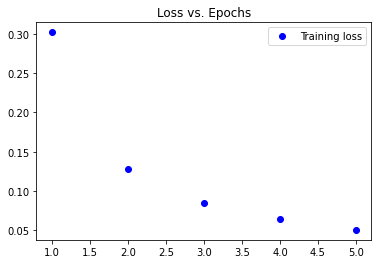

In [25]:
acc = historyA.history['accuracy']
loss = historyA.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [26]:
test_predictionsA = networkA.predict(test_images)

In [27]:
confA = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsA,axis=1))

<AxesSubplot:>

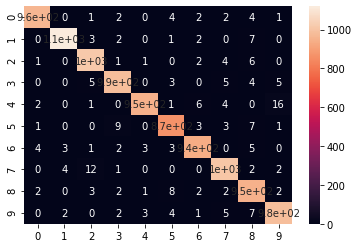

In [28]:
sns.heatmap(confA, annot=True)

### Conclusiones

Se puede observar que, tanto en la red neuronal default como en la de dos capas de 128 neuronas hay overfitting, y es peor en la segunda que en la primera. Aunado esto con el hecho de que la test_accuracy de la segunda es menor a la primera, es claro que el mejor modelo entre los dos es el primero. 

Probablemente el hecho de que tenga más capas con menos neuronas por capa hace que la función resultante esté más adaptada al conjunto de entrenamiento que el contraparte default. Por ello, se plantea la hipótesis que la cantidad de capas en la red es inversamente proporcional a la magnitud de su overfitting.

En la Red A, de la época 1 a la época 2, hay una mayor reducción de la pérdida en comparación a al misma reducción en la Red Default.

## Red B: 1 capa de 512 neuronas - Adam

In [61]:
networkB = models.Sequential()
networkB.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkB.add(layers.Dense(10, activation='softmax'))

In [62]:
networkB.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [63]:
historyB = networkB.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8709
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9663
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9897


In [64]:
test_lossB, test_accB = networkB.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 608us/step - loss: 0.0626 - accuracy: 0.9799


### Accuracy

In [65]:
print('test_acc:', test_accB)

test_acc: 0.9799000024795532


### Loss vs. Epoch

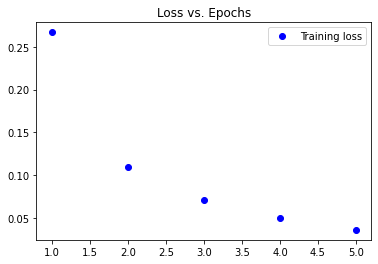

In [66]:
acc = historyB.history['accuracy']
loss = historyB.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [67]:
test_predictionsB = networkB.predict(test_images)

In [68]:
confB = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsB,axis=1))

<AxesSubplot:>

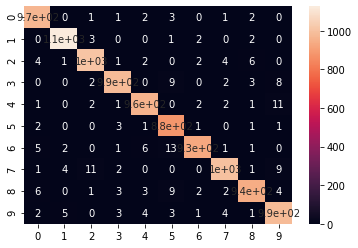

In [69]:
sns.heatmap(confB, annot=True)

### Conclusiones

Esta red es la que menos tiene overfitting de todas las probadas hasta este momento.

La gráfica de Loss vs. Epoch asemeja a la de la Red A.

## Red C: 2 capas de 128 neuronas - Adam

In [70]:
networkC = models.Sequential()
networkC.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkC.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkC.add(layers.Dense(10, activation='softmax'))

In [71]:
networkC.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [72]:
historyC = networkC.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.8319
Epoch 2/5
469/469 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9593
Epoch 3/5
469/469 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9727
Epoch 4/5
469/469 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9790
Epoch 5/5
469/469 [==============================] - 0s 994us/step - loss: 0.0523 - accuracy: 0.9843


In [73]:
test_lossC, test_accC = networkC.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 440us/step - loss: 0.0761 - accuracy: 0.9767


### Accuracy

In [74]:
print('test_acc:', test_accC)

test_acc: 0.9767000079154968


### Matriz de Confusión

### Loss vs. Epoch

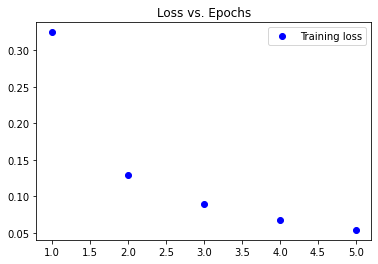

In [75]:
acc = historyC.history['accuracy']
loss = historyC.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

In [76]:
test_predictionsC = networkC.predict(test_images)

In [77]:
confC = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsC,axis=1))

<AxesSubplot:>

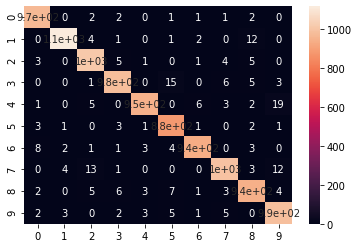

In [78]:
sns.heatmap(confC, annot=True)

### Conclusiones

Tiene un overfitting mayor que la Red B. Dicho esto, conserva la mejora en el modelo (entre la primera y la segunda época) al parecerse la gráfica de Epoch vs. Loss al de la Red B. Otra vez, más evidencia que refuerza la hipótesis planteada.

## Red D: 1 capa, 512 neuronas - SGD

In [79]:
networkD = models.Sequential()
networkD.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkD.add(layers.Dense(10, activation='softmax'))

In [80]:
networkD.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [81]:
historyD = networkD.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5491 - accuracy: 0.5957
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5682 - accuracy: 0.8652
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8869
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8980
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.9030


In [82]:
test_lossD, test_accD = networkD.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 628us/step - loss: 0.3151 - accuracy: 0.9146


### Accuracy

In [83]:
print('test_acc:', test_accD)

test_acc: 0.9146000146865845


### Loss vs. Epoch

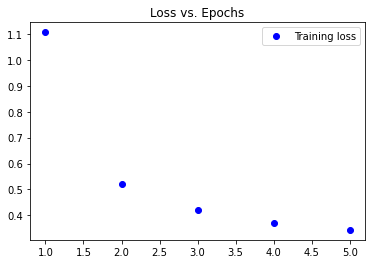

In [84]:
acc = historyD.history['accuracy']
loss = historyD.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [85]:
test_predictionsD = networkD.predict(test_images)

In [86]:
confD = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsD,axis=1))

<AxesSubplot:>

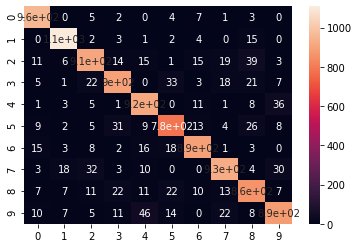

In [87]:
sns.heatmap(confD, annot=True)

### Conclusiones

La primera red sin overfitting (a pesar de tener la menor accuracy hasta el momento). 

La gráfica Epochs vs. Loss muestra la disminución más significativa de la pérdida entre épocas. Hasta ahora, es el modelo que "mejora más".

## Red E: 2 capas de 128 neuronas - SGD

In [88]:
networkE = models.Sequential()
networkE.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkE.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkE.add(layers.Dense(10, activation='softmax'))

In [89]:
networkE.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [90]:
historyE = networkE.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 940us/step - loss: 1.7388 - accuracy: 0.5154
Epoch 2/5
469/469 [==============================] - 0s 973us/step - loss: 0.5409 - accuracy: 0.8618
Epoch 3/5
469/469 [==============================] - 0s 914us/step - loss: 0.4008 - accuracy: 0.8873
Epoch 4/5
469/469 [==============================] - 0s 914us/step - loss: 0.3475 - accuracy: 0.8998
Epoch 5/5
469/469 [==============================] - 0s 917us/step - loss: 0.3153 - accuracy: 0.9079


In [91]:
test_lossE, test_accE = networkE.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 455us/step - loss: 0.2856 - accuracy: 0.9197


### Accuracy

In [92]:
print('test_acc:', test_accE)

test_acc: 0.919700026512146


### Loss vs. Epoch

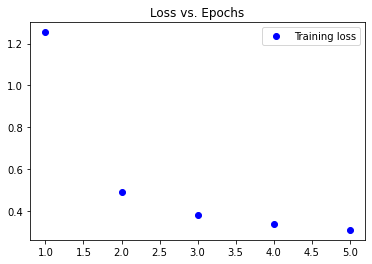

In [93]:
acc = historyE.history['accuracy']
loss = historyE.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [94]:
test_predictionsE = networkE.predict(test_images)

In [95]:
confE = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsE,axis=1))

<AxesSubplot:>

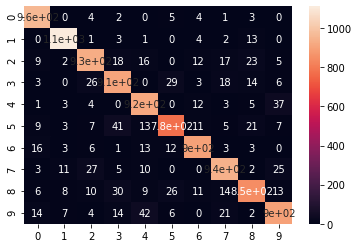

In [96]:
sns.heatmap(confE, annot=True)

### Conclusiones

Al igual que la Red E, tampoco tiene overfitting (a pesar de tener varias capas). Tiene mayor accuracy que la Red E, pero sigue siendo la segunda menor.

Dicho esto, es el modelo con la mayor disminución en la pérdida entre épocas, como se ve en la gráfica: vence a su contraparte de 1 capa.

## 2 capas de 512 neuronas - Adam

In [97]:
networkF = models.Sequential()
networkF.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkF.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkF.add(layers.Dense(10, activation='softmax'))

In [98]:
networkF.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [99]:
historyF = networkF.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3933 - accuracy: 0.8873
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9747
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9924


In [100]:
test_lossF, test_accF = networkC.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 485us/step - loss: 0.0761 - accuracy: 0.9767


### Accuracy

In [101]:
print('test_acc:', test_accF)

test_acc: 0.9767000079154968


### Loss vs. Epoch

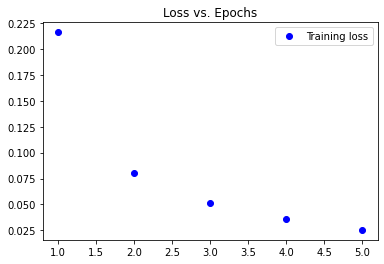

In [102]:
acc = historyF.history['accuracy']
loss = historyF.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [103]:
test_predictionsF = networkF.predict(test_images)

In [104]:
confF = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsF,axis=1))

<AxesSubplot:>

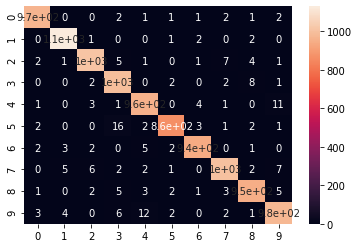

In [105]:
sns.heatmap(confF, annot=True)

### Conclusiones

Es la red con el peor overfitting de todas: una diferencia de más de 2% entre la accuracy del conjunto de prueba y el conjunto de entrenamiento. Más evidencia que refuerza la hipótesis.

La gráfica Epoch vs. Loss indica que no había mucha pérdida desde la primera época, entonces, el impacto de las siguientes épocas fue mínimo.

## Red G: 2 capas de 512 neuronas - SGD

In [106]:
networkG = models.Sequential()
networkG.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkG.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkG.add(layers.Dense(10, activation='softmax'))

In [107]:
networkG.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [108]:
historyG = networkG.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 1.5642 - accuracy: 0.6268
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4874 - accuracy: 0.8754
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8990
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.9097
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2927 - accuracy: 0.9182


In [109]:
test_lossG, test_accG = networkG.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 762us/step - loss: 0.2691 - accuracy: 0.9257


### Accuracy

In [110]:
print('test_acc:', test_accG)

test_acc: 0.9257000088691711


### Loss vs. Epoch

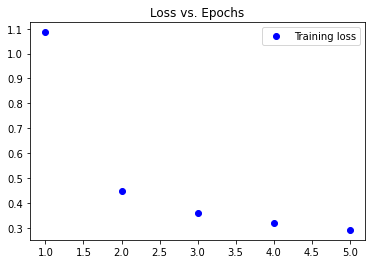

In [111]:
acc = historyG.history['accuracy']
loss = historyG.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [112]:
test_predictionsG = networkG.predict(test_images)

In [113]:
confG = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsG,axis=1))

<AxesSubplot:>

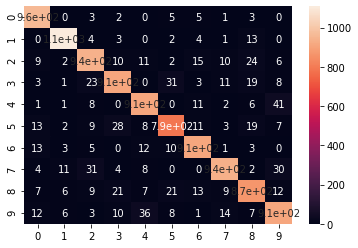

In [114]:
sns.heatmap(confG, annot=True)

### Conclusiones

El optimizador SGD sigue sin dar overfitting en sus resultados y, de hecho, aumentó su accuracy con la adición de neuronas a sus capas. Hasta ahora, es el único modelo que no cumple con la hipótesis planteada.

Igualmente, como lo demuestra la gráfica Epochs vs. Loss, sigue la tendencia de las demás redes SGD de disminuir su pérdida en mayor magnitud mientras más capas tiene (aunque no tanto como su contraparte de 128 neuronas).

## Red H: 2 capas de 512 neuronas - RMSProp

In [115]:
networkH = models.Sequential()
networkH.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkH.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkH.add(layers.Dense(10, activation='softmax'))

In [116]:
networkH.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [117]:
historyH = networkH.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3987 - accuracy: 0.8720
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0892 - accuracy: 0.9723
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0357 - accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9916


In [118]:
test_lossh, test_accH = networkH.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 730us/step - loss: 0.0823 - accuracy: 0.9780


### Accuracy

In [119]:
print('test_acc:', test_accH)

test_acc: 0.9779999852180481


### Loss vs. Epoch

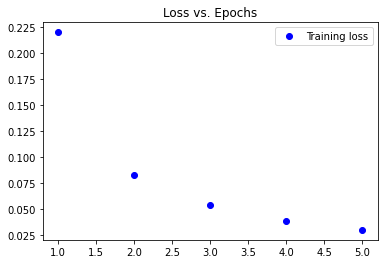

In [120]:
acc = historyH.history['accuracy']
loss = historyH.history['loss']

epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [121]:
test_predictionsH = networkH.predict(test_images)

In [122]:
confH = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsH,axis=1))

<AxesSubplot:>

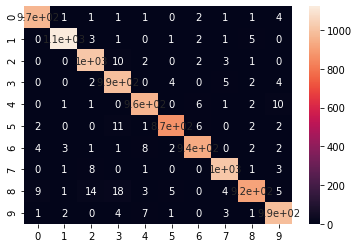

In [123]:
sns.heatmap(confH, annot=True)

### Conclusiones

Por primera vez, el optimizador RMSProp nos da una gráfica Loss vs. Epochs con forma de función racional, al igual que el tercer mayor accuracy. 

Dicho esto aún tiene overfitting y no muestra una mejora significativa en la dismunición de la pérdida entre épocas.

## Tablas ROC

In [124]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [125]:
fpr=dict()
tpr=dict()
roc_auc = dict()
fprA=dict()
tprA=dict()
roc_aucA = dict()
fprB=dict()
tprB=dict()
roc_aucB = dict()
fprC=dict()
tprC=dict()
roc_aucC = dict()
fprD=dict()
tprD=dict()
roc_aucD = dict()
fprE=dict()
tprE=dict()
roc_aucE = dict()
fprF=dict()
tprF=dict()
roc_aucF = dict()
fprG=dict()
tprG=dict()
roc_aucG = dict()
fprH=dict()
tprH=dict()
roc_aucH = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fprA[i], tprA[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsA[:, i])
    roc_aucA[i] = auc(fprA[i], tprA[i])
    
    fprB[i], tprB[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsB[:, i])
    roc_aucB[i] = auc(fprB[i], tprB[i])
    
    fprC[i], tprC[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsC[:, i])
    roc_aucC[i] = auc(fprC[i], tprC[i])
    
    fprD[i], tprD[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsD[:, i])
    roc_aucD[i] = auc(fprD[i], tprD[i])
    
    fprE[i], tprE[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsE[:, i])
    roc_aucE[i] = auc(fprE[i], tprE[i])
    
    fprF[i], tprF[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsF[:, i])
    roc_aucF[i] = auc(fprF[i], tprF[i])
    
    fprG[i], tprG[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsG[:, i])
    roc_aucG[i] = auc(fprG[i], tprG[i])
    
    fprH[i], tprH[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsH[:, i])
    roc_aucH[i] = auc(fprH[i], tprH[i])

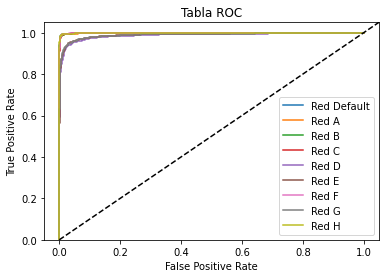

In [126]:
plt.plot(fpr[i], tpr[i], label='Red Default'% roc_auc[2])
plt.plot(fprA[i], tprA[i], label='Red A'% roc_aucA[2])
plt.plot(fprB[i], tprB[i], label='Red B'% roc_aucB[2])
plt.plot(fprC[i], tprC[i], label='Red C'% roc_aucC[2])
plt.plot(fprD[i], tprD[i], label='Red D'% roc_aucD[2])
plt.plot(fprE[i], tprE[i], label='Red E'% roc_aucE[2])
plt.plot(fprF[i], tprF[i], label='Red F'% roc_aucF[2])
plt.plot(fprG[i], tprG[i], label='Red G'% roc_aucG[2])
plt.plot(fprH[i], tprH[i], label='Red H'% roc_aucH[2])
plt.plot([0, 10], [0, 10], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabla ROC')
plt.legend(loc="lower right")


plt.show()

### Acercamiento

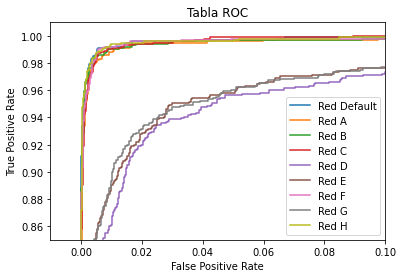

In [127]:
plt.plot(fpr[i], tpr[i], label='Red Default'% roc_auc[2])
plt.plot(fprA[i], tprA[i], label='Red A'% roc_aucA[2])
plt.plot(fprB[i], tprB[i], label='Red B'% roc_aucB[2])
plt.plot(fprC[i], tprC[i], label='Red C'% roc_aucC[2])
plt.plot(fprD[i], tprD[i], label='Red D'% roc_aucD[2])
plt.plot(fprE[i], tprE[i], label='Red E'% roc_aucE[2])
plt.plot(fprF[i], tprF[i], label='Red F'% roc_aucF[2])
plt.plot(fprG[i], tprG[i], label='Red G'% roc_aucG[2])
plt.plot(fprH[i], tprH[i], label='Red H'% roc_aucH[2])
plt.plot([0, 10], [0, 10], 'k--')
plt.xlim([-0.01, 0.1])
plt.ylim([0.85, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabla ROC')
plt.legend(loc="lower right")

plt.show()

## Conclusiones

Como se puede ver en la tabla ROC, la mejor clasificadora es la Red B (la de 512 neuronas, con Adam como optimizador). Dicho esto, las redes A, C, F, y H se le acercan. Las peores clasificadoras fueron las redes G, D y E (es decir, todas la redes que utilizan el optimizador SGD).

Dicho esto, la mejor de las redes que utilizaban SGD fue la red G, la que tenía más neuronas y más capas por neuronas de las tres peores. Esto, aunado con el hecho de que las redes con el optimizador SGD eran las únicas sin overfitting y a las que no se les aplicaba la hipótesis mencionada anteriormente, lleva a considerar la posibilidad de que una red que utilice el optimizador SGD, pero que tenga más de dos capas, alcanzaría la acccuracy de las redes que utilizan Adam y RMSdrop, pero sin tener overfitting. 

Esta hipótesis es reforzada por el hecho de que las redes SGD son las que tienen la disminución de mayor magnitud en la pérdida entre cada época.

Cabría probar esta última hipótesis en una computadora que no emita ruidos preocupantes cuando se ejecuta este notebook.